# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

Из домашнего задания: $$ \mathsf{E}(\xi | \mathcal{G}) = \dfrac{e^\lambda(\lambda (n - 1) + 1) - n\lambda - 1}{\lambda(e^\lambda - 1)}$$

и, совершенно аналогично:

$$\mathsf{E}(\xi^2 | \mathcal{G}) = \dfrac{e^\lambda (\lambda (n-1)(\lambda(n-1) + 2) + 2) - \lambda n(\lambda n + 2) - 2 }{\lambda^2 (e^\lambda - 1)}$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

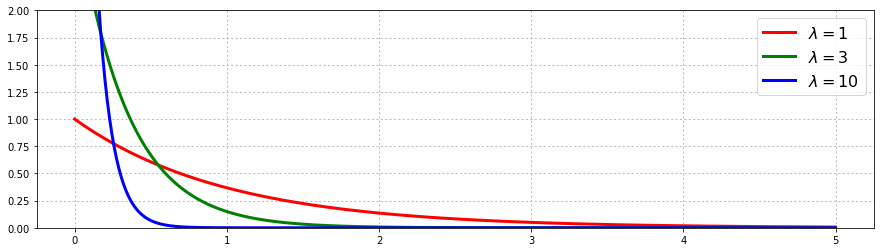

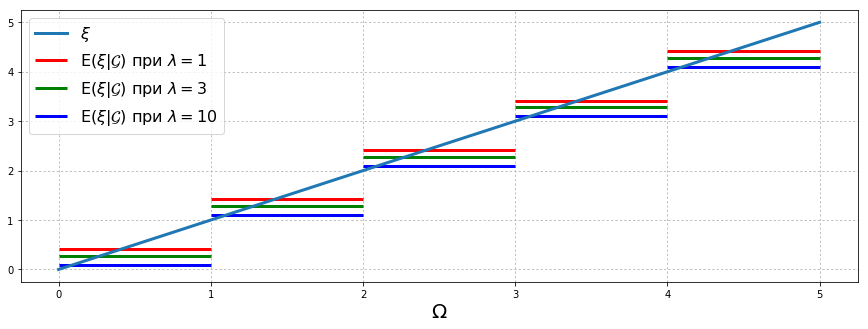

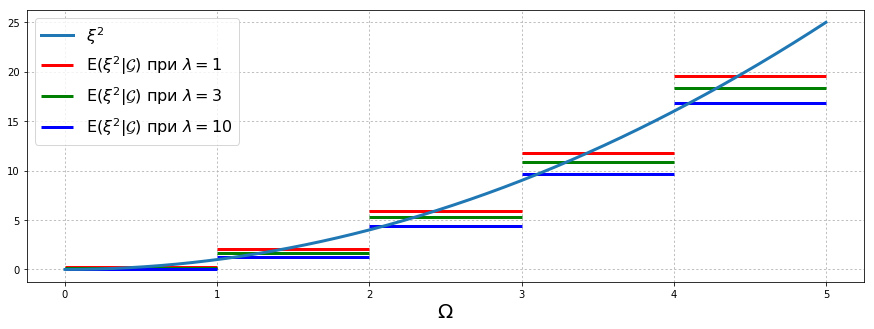

In [3]:
lambd = [1, 3, 10]
grid = np.linspace(0, 5, 1000)
color = ['r', 'g', 'b']

plt.figure(figsize=(15, 4))
for i, l in enumerate(lambd):
    # График 1    
    plt.plot(grid, sps.expon.pdf(grid, scale=1/l), color=color[i], lw=3, label='$\\lambda={}$'.format(l))
    plt.legend(fontsize=16)
    plt.ylim((0, 2))
    plt.grid(ls=':')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(grid, grid, lw=3, label='$\\xi$')
for j, l in enumerate(lambd):
    # График 2
    for i in range(1, 6):  # события из сигма-алгебры
        plt.hlines((np.exp(-l * i) * (np.exp(l) * (l * (i - 1) + 1) - l * i - 1) / l) / ((np.exp(l) - 1) * np.exp(-i * l)), i - 1, i, color=color[j], lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(l) + '$') if i == 1 else '')
    plt.xlabel('$\\Omega$', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(ls=':')
plt.show()

    # График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
plt.plot(grid, grid ** 2, lw=3, label='$\\xi^2$')
for i, l in enumerate(lambd):
    for n in range(1, 6):
        plt.hlines(( (np.exp(-l * n) * (np.exp(l) * (l * (n - 1) * (l * (n - 1) + 2) + 2) - l * n * (l * n + 2) - 2)) / (l ** 2)) / ((np.exp(l) - 1) * np.exp(-n * l)), n - 1, n, color=color[i], lw=3, 
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(l) + '$') if n == 1 else '')
    plt.xlabel('$\\Omega$', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(ls=':')
plt.show()

**Вывод:** условное матожидание равно усреднению не по всему множеству, а только по элементам разбиения

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}$.

Знаем, что $p_{(\xi_1, \xi_2)} (x, y) = \frac{1}{2 \pi | \Sigma | ^ {\frac{1}{2}}}  e^{-\frac{1}{2} (\overline{x} - \mu)^{T} \Sigma^{-1} (\overline{x} - \mu)} = \frac{1}{12 \pi} e^{-\frac{1}{36}(5x^2 - 8xy + 5y^2)}$

Тогда: $p_{\xi_2}(y) = \int_{-\infty}^{\infty}p_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{12\sqrt{5\pi}} e ^ {-\frac{1}{20}y^2}$

И в итоге: $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{1}{6} \sqrt{\frac{5}{\pi}} e^{-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4}{45}y^2}$

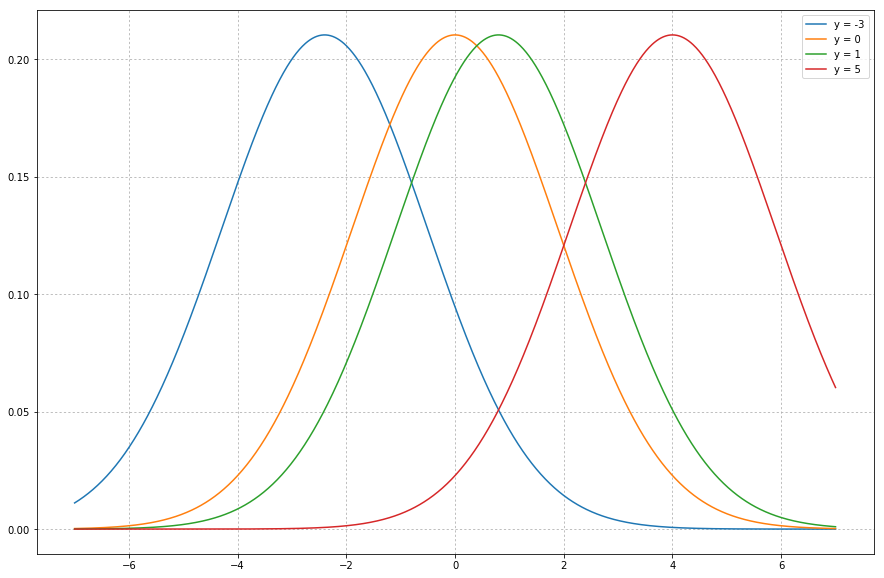

In [4]:
cov = [[10, 8], [8, 10]]
Y = [-3, 0, 1, 5]
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(15, 10))
for y in Y:
    grid_2 = np.ones_like(grid) * y
    pos = np.empty(grid.shape + (2,))
    pos[:, 0] = grid; pos[:, 1] = grid_2
    plt.plot(grid, sps.multivariate_normal.pdf(pos, mean=[0, 0], cov=cov) / sps.norm.pdf(y, scale=np.sqrt(10)), 
             label='y = {}'.format(y))
plt.grid(ls=':')
plt.legend()
plt.show()

**Вывод:** видно что условное распределение имеет плотность какого-то нормального распределения

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_s + N_t - N_s | N_s) = N_s + \mathsf{E}( N_t - N_s) = N_s + \lambda(t-s)$

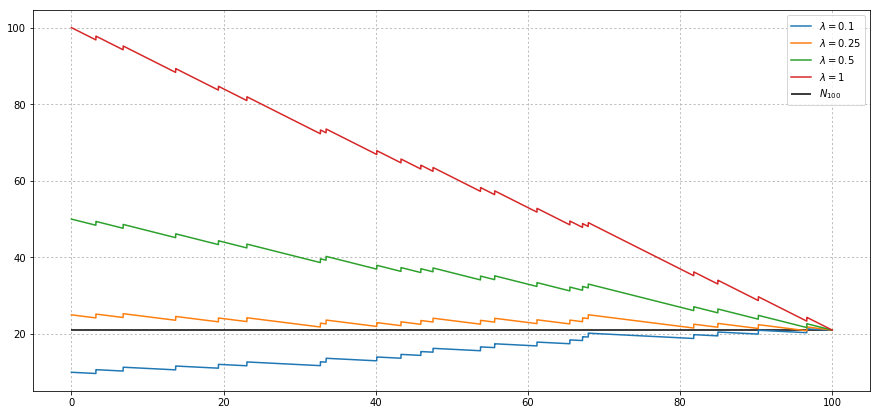

In [5]:
sample = sps.expon.rvs(size=100, scale=4)
cum_sum = sample.cumsum()
n_100 = 0
for i, s in enumerate(cum_sum):
    if s > 100:
        n_100 = i
        break
grid = np.linspace(0, 100, 10000)
n_s = []
for s in grid:
    for i, c_sum in enumerate(cum_sum):
        if c_sum > s:
            n_s.append(i)
            break
plt.figure(figsize=(15,7))
lambd = [0.1, 0.25, 0.5, 1]
for l in lambd:
    plt.plot(grid, l * (100 - grid) + n_s, label='$\\lambda = {}$'.format(l))
plt.hlines(n_100, 0, 100, label='$N_{100}$')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Из графиков видно, что ожидаемо, что чем больше s тем точнее предсказание. Так же видно, что лучшее предсказание при $\lambda = \lambda_{выборки}$

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
data['data']  # выборка
#data['target']  # номера компонент смеси

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [7]:
mean = []
cov = []
for i in range(3):
    mean.append(data['data'][data['target'] == i].mean(axis=0))
    cov.append(np.cov(data['data'][data['target'] == i], rowvar=False))
    print('Class: {} mean: {} cov:\n{}'.format(i, mean[i], cov[i]))

Class: 0 mean: [ 5.006  3.418  1.464  0.244] cov:
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
Class: 1 mean: [ 5.936  2.77   4.26   1.326] cov:
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
Class: 2 mean: [ 6.588  2.974  5.552  2.026] cov:
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

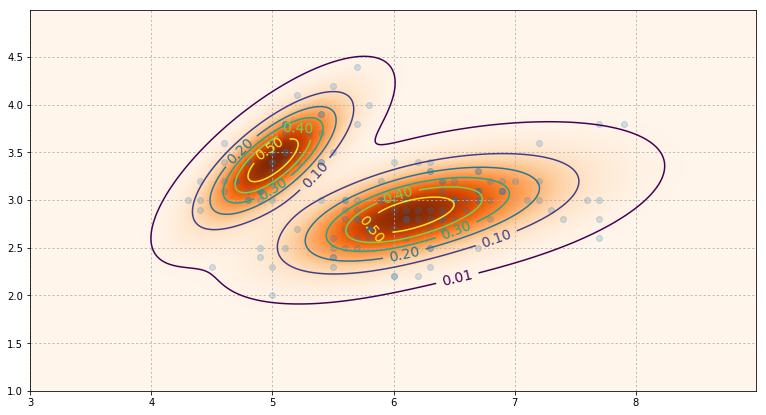

In [8]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3:9:0.01, 1:5:0.01]
x = grid[0]
y = grid[1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x 
pos[:, :, 1] = y

density = 0
for i in range(3):
    density += sps.multivariate_normal.pdf(pos, mean=[mean[i][0], mean[i][1]], cov=[[cov[i][0][0], cov[i][0][1]], [cov[i][1][0], cov[i][1][1]]])
density /= 3

plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(data['data'][:, 0], data['data'][:, 1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.grid(ls=':')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

Условная плотность будет иметь значение обычной плотности смеси, но только на 2 компонентах.

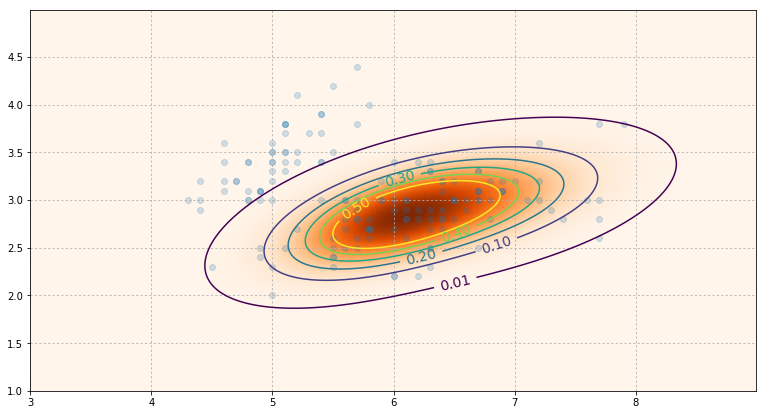

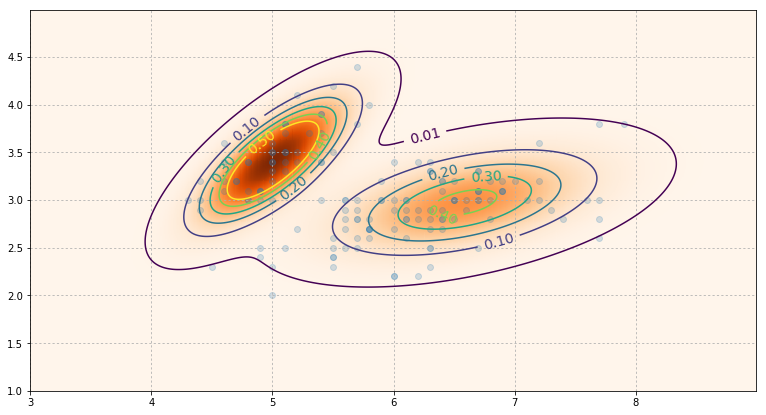

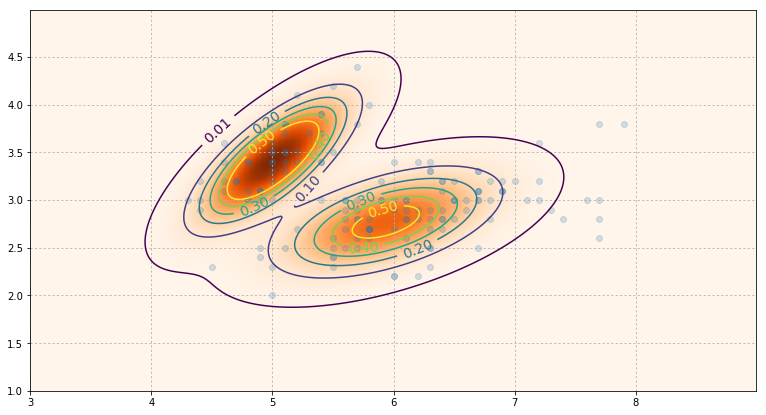

In [9]:
grid = np.mgrid[3:9:0.01, 1:5:0.01]
x = grid[0]
y = grid[1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x 
pos[:, :, 1] = y

density = [0, 0, 0]
for j in [0, 1, 2]:
    for i in range(3):
        if i == j:
            continue
        density[j] += sps.multivariate_normal.pdf(pos, mean=[mean[i][0], mean[i][1]], cov=[[cov[i][0][0], cov[i][0][1]], [cov[i][1][0], cov[i][1][1]]])
    density[j] /= 2

for j in [0, 1, 2]:
    plt.figure(figsize=(13, 7))
    plt.pcolormesh(grid[0], grid[1], density[j], cmap='Oranges')
    plt.scatter(data['data'][:, 0], data['data'][:, 1], alpha=0.2)
    CS = plt.contour(grid[0], grid[1], density[j], [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.grid(ls=':')
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [10]:
...

Ellipsis

**Вывод:** ...

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture